---- Estimaciones de la distancia focal ----

1. Método analítico:
   f = 18.43 ± 0.31 cm

2. Método gráfico (intersección de pares):
   f ≈ 44.40 cm

3. Relación mínima (do + di = 4f):
   f = 18.25 cm


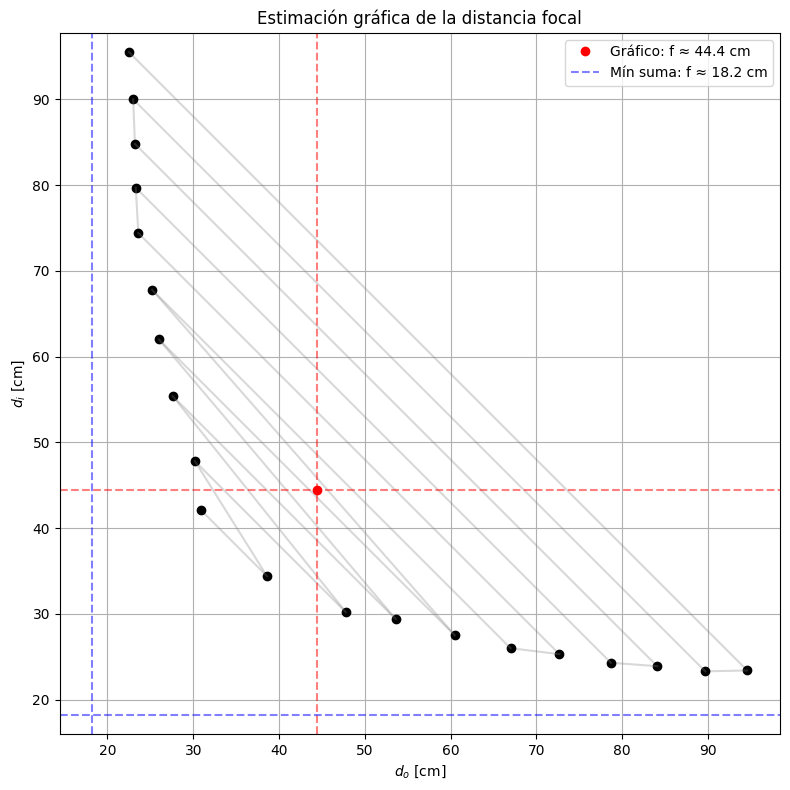

73.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Datos experimentales
di = np.array([95.5, 23.4, 23.3, 90, 84.8, 23.9, 24.3, 79.7, 74.4, 25.3,
               26, 67.8, 27.5, 62, 29.4, 55.4, 30.2, 47.8, 34.4, 42.1])
d0 = np.array([22.5, 94.6, 89.7, 23, 23.2, 84.1, 78.7, 23.3, 23.6, 72.7,
               67, 25.2, 60.5, 26, 53.6, 27.6, 47.8, 30.2, 38.6, 30.9])

# 1. MÉTODO ANALÍTICO
f_analitico = (d0 * di) / (d0 + di)
f_analitico_prom = np.mean(f_analitico)
f_analitico_std = np.std(f_analitico)

# 2. MÉTODO GRÁFICO (INTERSECCIÓN DE PARES)
def intersection(p1, p2, p3, p4):
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    x4, y4 = p4

    denom = (x1 - x2)*(y3 - y4) - (y1 - y2)*(x3 - x4)
    if denom == 0:
        return None

    px = ((x1*y2 - y1*x2)*(x3 - x4) - (x1 - x2)*(x3*y4 - y3*x4)) / denom
    py = ((x1*y2 - y1*x2)*(y3 - y4) - (y1 - y2)*(x3*y4 - y3*x4)) / denom
    return (px, py)

intersecciones = []
for i in range(len(d0)-1):
    p1 = (d0[i], di[i])
    p2 = (d0[i+1], di[i+1])
    for j in range(i+1, len(d0)-1):
        p3 = (d0[j], di[j])
        p4 = (d0[j+1], di[j+1])
        inter = intersection(p1, p2, p3, p4)
        if inter and 0 < inter[0] < 100 and 0 < inter[1] < 100:
            intersecciones.append(inter)

intersecciones = np.array(intersecciones)
f_grafico = np.mean(intersecciones, axis=0)
f_grafico_prom = np.mean(f_grafico)

# 3. MÉTODO TEÓRICO: DO + DI MÍNIMO
suma_distancias = d0 + di
min_suma = np.min(suma_distancias)
f_por_min_suma = min_suma / 4

# IMPRIMIR RESULTADOS
print("---- Estimaciones de la distancia focal ----\n")
print(f"1. Método analítico:")
print(f"   f = {f_analitico_prom:.2f} ± {f_analitico_std:.2f} cm")

print(f"\n2. Método gráfico (intersección de pares):")
print(f"   f ≈ {f_grafico_prom:.2f} cm")

print(f"\n3. Relación mínima (do + di = 4f):")
print(f"   f = {f_por_min_suma:.2f} cm")

# OPCIONAL: GRAFICAR PARES CON ESTIMACIÓN GRÁFICA
plt.figure(figsize=(8, 8))
for i in range(len(d0)):
    plt.plot(d0[i], di[i], 'ko')
    if i < len(d0)-1:
        plt.plot([d0[i], d0[i+1]], [di[i], di[i+1]], 'gray', alpha=0.3)

# Marcar punto de intersección promedio
plt.plot(f_grafico_prom, f_grafico_prom, 'ro', label=f'Gráfico: f ≈ {f_grafico_prom:.1f} cm')
plt.axvline(f_grafico_prom, linestyle='--', color='r', alpha=0.5)
plt.axhline(f_grafico_prom, linestyle='--', color='r', alpha=0.5)

# Marcar mínimo do+di
plt.axvline(f_por_min_suma, linestyle='--', color='b', alpha=0.5, label=f'Mín suma: f ≈ {f_por_min_suma:.1f} cm')
plt.axhline(f_por_min_suma, linestyle='--', color='b', alpha=0.5)

plt.xlabel('$d_o$ [cm]')
plt.ylabel('$d_i$ [cm]')
plt.title('Estimación gráfica de la distancia focal')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.tight_layout()
plt.show()
print(min_suma)

C:\Users\USER\AppData\Local\Temp\ipykernel_10812\2541487369.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, y, 'k--', label='$d_o + d_i = 4f$ (mínima distancia)',color="magenta")
C:\Users\USER\AppData\Local\Temp\ipykernel_10812\2541487369.py:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 100], [0, 100], 'k-', alpha=0.2, label='$d_i = d_o$',color="darkgreen")


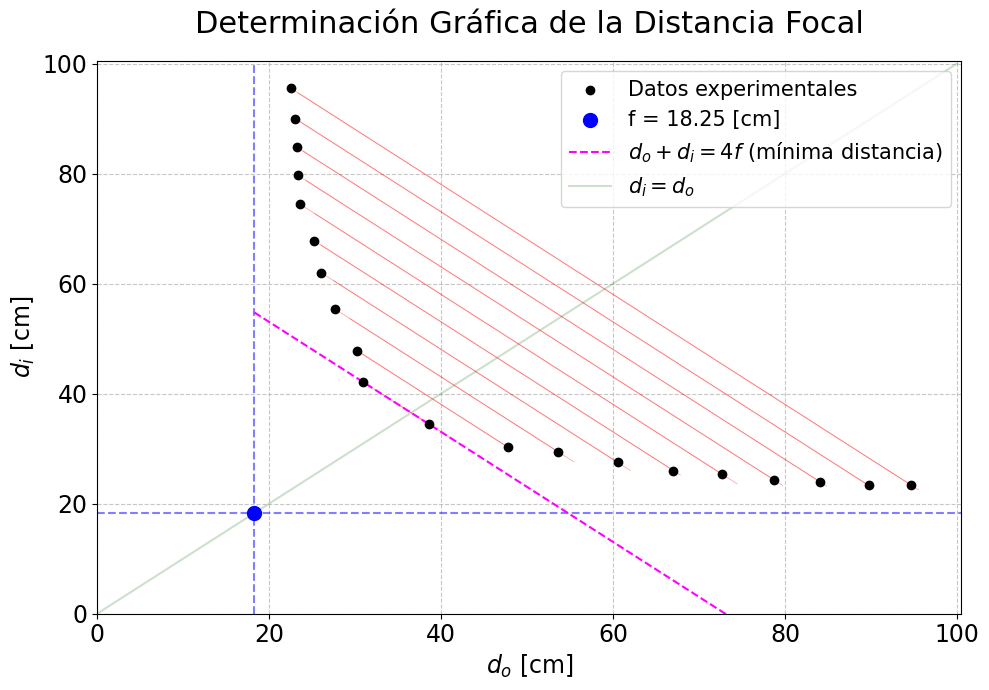

Valor estimado de la distancia focal: f = 18.25 cm


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

# Datos experimentales
di = np.array([95.5, 23.4, 23.3, 90, 84.8, 23.9, 24.3, 79.7, 74.4, 25.3,
               26, 67.8, 27.5, 62, 29.4, 55.4, 30.2, 47.8, 34.4, 42.1])
do = np.array([22.5, 94.6, 89.7, 23, 23.2, 84.1, 78.7, 23.3, 23.6, 72.7,
               67, 25.2, 60.5, 26, 53.6, 27.6, 47.8, 30.2, 38.6, 30.9])

# Calculamos la suma do + di para encontrar el mínimo
suma = do + di
min_index = np.argmin(suma)
min_sum = suma[min_index]
f_estimada = min_sum / 4

# Configuración del gráfico
plt.figure(figsize=(10, 7))
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Determinación Gráfica de la Distancia Focal', fontsize=22, pad=20)
plt.xlabel('$d_o$ [cm]', fontsize=17)
plt.ylabel('$d_i$ [cm]', fontsize=17)

# Graficamos los puntos experimentales
plt.scatter(do, di, color='black', label='Datos experimentales', zorder=5)

# Dibujamos las líneas que unen los puntos simétricos
for i in range(len(do)):
    plt.plot([do[i], di[i]], [di[i], do[i]], 'r-', alpha=0.3, linewidth=0.7)

# Punto de intersección (f, f)
plt.scatter([f_estimada], [f_estimada], color='blue', s=100, 
            label=f'f = {f_estimada:.2f} [cm]', zorder=5)

# Líneas perpendiculares desde A a los ejes
plt.axhline(y=f_estimada, color='blue', linestyle='--', alpha=0.5)
plt.axvline(x=f_estimada, color='blue', linestyle='--', alpha=0.5)

# Línea a trazos para d_o + d_i = 4f (mínima distancia)f
x = np.linspace(f_estimada, 100, 100)
y = 4*f_estimada - x
plt.plot(x, y, 'k--', label='$d_o + d_i = 4f$ (mínima distancia)',color="magenta")

# Configuramos los límites de los ejes
plt.xlim(0, max(max(do), max(di)) + 5)
plt.ylim(0, max(max(do), max(di)) + 5)

# Línea y = x para referencia
plt.plot([0, 100], [0, 100], 'k-', alpha=0.2, label='$d_i = d_o$',color="darkgreen")

# Mostramos la leyenda
plt.legend(fontsize=15, loc='upper right')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)


plt.tight_layout()
plt.show()

# Mostramos el valor calculado
print(f"Valor estimado de la distancia focal: f = {f_estimada:.2f} cm")

Advertencia: La optimización falló, usando mediana de intersecciones


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

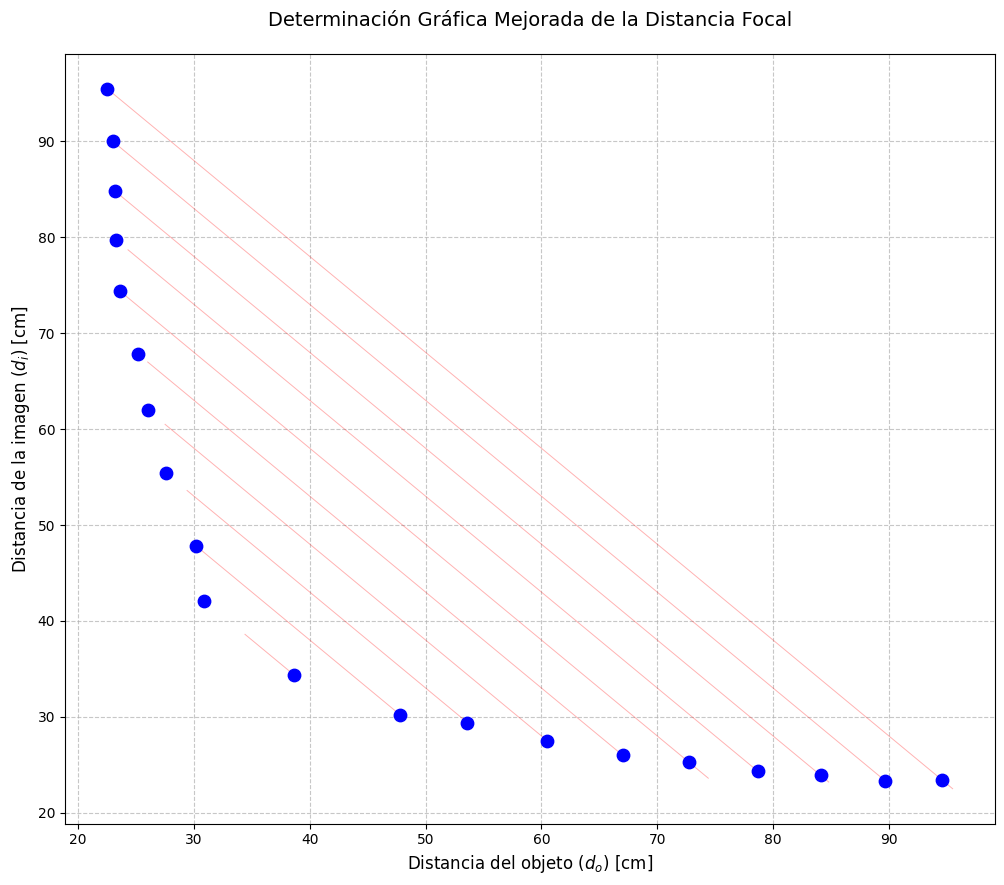

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.optimize import least_squares

# Datos experimentales
di = np.array([95.5, 23.4, 23.3, 90, 84.8, 23.9, 24.3, 79.7, 74.4, 25.3,
               26, 67.8, 27.5, 62, 29.4, 55.4, 30.2, 47.8, 34.4, 42.1])
do = np.array([22.5, 94.6, 89.7, 23, 23.2, 84.1, 78.7, 23.3, 23.6, 72.7,
               67, 25.2, 60.5, 26, 53.6, 27.6, 47.8, 30.2, 38.6, 30.9])

# Función mejorada para encontrar intersección entre líneas
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
        return None  # Líneas paralelas

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    
    # Verificamos que la intersección esté en el segmento de línea
    def on_segment(p, line):
        x_min = min(line[0][0], line[1][0])
        x_max = max(line[0][0], line[1][0])
        y_min = min(line[0][1], line[1][1])
        y_max = max(line[0][1], line[1][1])
        return (x_min <= p[0] <= x_max) and (y_min <= p[1] <= y_max)
    
    if on_segment((x,y), line1) and on_segment((x,y), line2):
        return x, y
    return None

# Generamos todas las combinaciones posibles de líneas
lines = []
for i in range(len(do)):
    lines.append(((do[i], di[i]), (di[i], do[i])))

# Calculamos intersecciones válidas con filtros adicionales
intersections = []
for line1, line2 in combinations(lines, 2):
    intersection = line_intersection(line1, line2)
    if intersection is not None:
        x, y = intersection
        # Filtramos puntos físicamente razonables
        if x > 10 and y > 10 and x < 100 and y < 100:
            intersections.append((x, y))

intersections = np.array(intersections)

# Función de residuos para la optimización
def residuals(f, points):
    return np.sqrt((points[:,0] - f[0])**2 + (points[:,1] - f[1])**2)

# Estimación inicial basada en la mediana (más robusta que la media)
initial_guess = np.median(intersections, axis=0)

# Optimización con límites físicos razonables
bounds = ([10, 10], [50, 50])  # Asumiendo que f debe estar entre 10 y 50 cm
try:
    result = least_squares(residuals, initial_guess, bounds=bounds, args=(intersections,))
    f_opt = result.x
    f_estimated = np.mean(f_opt)
    
    # Si la optimización falla, usamos la mediana
except ValueError:
    print("Advertencia: La optimización falló, usando mediana de intersecciones")
    f_opt = initial_guess
    f_estimated = np.mean(f_opt)

# Configuración del gráfico
plt.figure(figsize=(12, 10))
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Determinación Gráfica Mejorada de la Distancia Focal', 
          fontsize=14, pad=20)
plt.xlabel('Distancia del objeto ($d_o$) [cm]', fontsize=12)
plt.ylabel('Distancia de la imagen ($d_i$) [cm]', fontsize=12)

# Graficamos los puntos experimentales
plt.scatter(do, di, color='blue', s=80, label='Datos experimentales', zorder=5)

# Dibujamos líneas representativas (no todas para mayor claridad)
for i in range(0, len(lines), 2):  # Mostramos cada segunda línea
    p1, p2 = lines[i]
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'r-', alpha=0.3, linewidth=0.7)

# Graficamos las intersecciones válidas
plt.scatter(intersections[:,0], intersections[:,1], color='orange', s=40, 
            alpha=0.6, label='Intersecciones válidas', zorder=4)

# Punto focal estimado
plt.scatter([f_opt[0]], [f_opt[1]], color='green', s=200, marker='*', 
            label=f'Punto focal estimado (f ≈ {f_estimated:.2f} cm)', zorder=6)

# Líneas perpendiculares
plt.axhline(y=f_opt[1], color='green', linestyle='--', alpha=0.5)
plt.axvline(x=f_opt[0], color='green', linestyle='--', alpha=0.5)

# Línea de mínima distancia
x = np.linspace(f_estimated, 100, 100)
y = 4*f_estimated - x
plt.plot(x, y, 'k--', label='$d_o + d_i = 4f$ (mínima distancia)')

# Configuración de ejes
max_val = max(max(do), max(di)) + 5
plt.xlim(0, max_val)
plt.ylim(0, max_val)

# Línea de referencia y = x
plt.plot([0, max_val], [0, max_val], 'k-', alpha=0.2, label='$d_i = d_o$')

# Leyenda y anotaciones
plt.legend(fontsize=10, loc='upper right')
plt.text(f_opt[0] + 3, f_opt[1] - 3, 
         f'$f$ ≈ {f_estimated:.2f} cm\n(Desviación: ±{np.std(intersections).mean():.2f} cm', 
         fontsize=12, color='green', bbox=dict(facecolor='white', alpha=0.8))

# Información adicional
plt.text(70, 15, 
         f'Intersecciones válidas: {len(intersections)}/{len(list(combinations(lines, 2)))}\n' +
         f'Mínimo (d₀+dᵢ): {np.min(do + di)/4:.2f} cm', 
         fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Resultados
print("\nRESULTADOS:")
print(f"Estimación gráfica de f: {f_estimated:.2f} ± {np.std(intersections).mean():.2f} cm")
print(f"Valor del método del mínimo: {np.min(do + di)/4:.2f} cm")
print(f"Número de intersecciones válidas: {len(intersections)}")

In [2]:
ele=1.60e-19
me=9.11e-31
eps=8.85e-12
hbar=1.055e-34
import numpy as np

In [3]:
x= ele**(4) * me   /  (32*np.pi**(2) *eps**(2)  * hbar**2)
print(x)

2.1684884994978687e-18


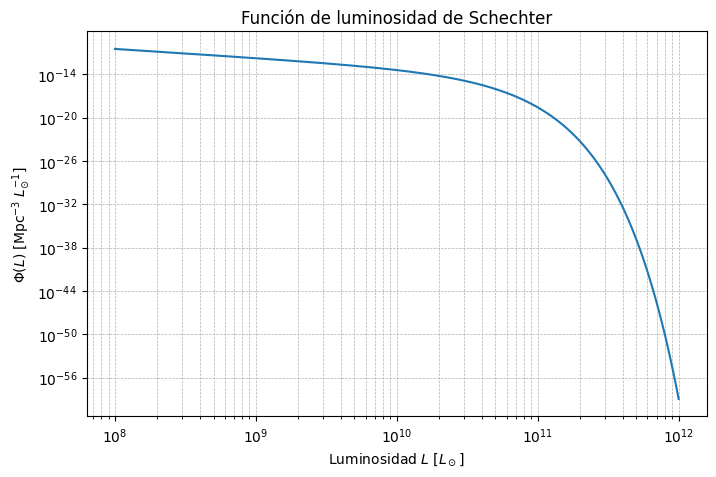

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros típicos de Schechter
alpha = -1.25
L_star = 1e10  # Luminosidad solar
n_star = 1e-3  # en Mpc^{-3}

# Eje de luminosidades
L = np.logspace(8, 12, 500)  # entre 10^8 y 10^12 L_sun

# Función de Schechter
phi = n_star * (L / L_star)**alpha * np.exp(-L / L_star) * (1 / L_star)

# Graficar
plt.figure(figsize=(8, 5))
plt.loglog(L, phi)
plt.xlabel('Luminosidad $L$ [$L_\\odot$]')
plt.ylabel(r'$\Phi(L)$ [Mpc$^{-3}$ $L^{-1}_{\odot}$]')
plt.title('Función de luminosidad de Schechter')
plt.grid(True, which='both', ls='--', lw=0.5)
plt.show()


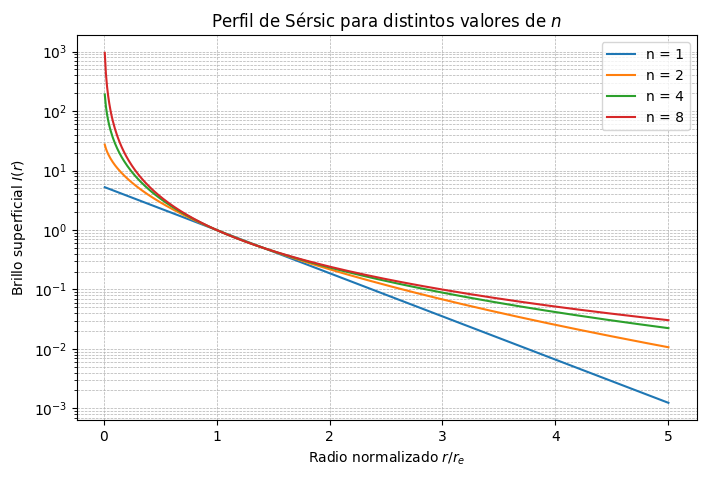

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sersic_profile(r, n, re=1, Ie=1):
    bn = 2*n - 0.327
    return Ie * np.exp(-bn * ((r/re)**(1/n) - 1))

r = np.linspace(0.01, 5, 500)
plt.figure(figsize=(8,5))
for n in [1, 2, 4, 8]:
    I = sersic_profile(r, n)
    plt.plot(r, I, label=f'n = {n}')
    
plt.yscale('log')
plt.xlabel('Radio normalizado $r / r_e$')
plt.ylabel('Brillo superficial $I(r)$')
plt.title('Perfil de Sérsic para distintos valores de $n$')
plt.legend()
plt.grid(True, which='both', ls='--', lw=0.5)
plt.show()


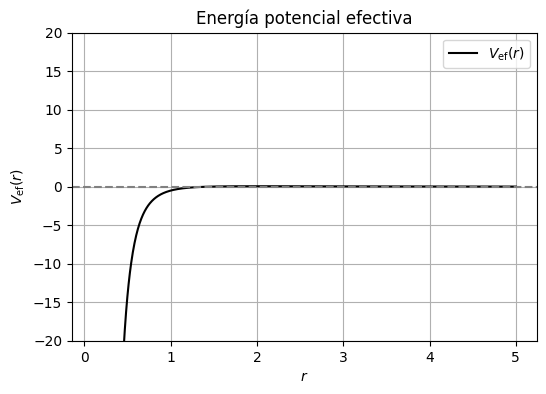

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros arbitrarios para graficar
C = 1
L = 1
mu = 1

r = np.linspace(0.1, 5, 1000)
V = -C / r**4
V_cent = L**2 / (2 * mu * r**2)
V_eff = V + V_cent

plt.figure(figsize=(6,4))
plt.plot(r, V_eff, label=r'$V_{\mathrm{ef}}(r)$', color='black')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel(r'$r$')
plt.ylabel(r'$V_{\mathrm{ef}}(r)$')
plt.title('Energía potencial efectiva')
plt.legend()
plt.grid(True)
plt.ylim(-20, 20)
plt.show()
